In [1]:
#!/usr/bin/env python3

"""

    Python Version: 3.6

        Polynomial Interpolation

    L.J. Brown
    Fall 2018
    
"""

'\n\n    Python Version: 3.6\n\n        Polynomial Interpolation\n\n    L.J. Brown\n    Fall 2018\n    \n'

# Polynomial Interpolation

* Basic Idea
* Uniqueness
* Newton Form
* Divided Diffrence
* Hermite Interpolation

## Helper Methods for Demo

In [2]:
from scipy import interpolate

# create interpolating polynomial for demo
def get_interpolating_polynomial(data_points):
    
    # interpolating polynomial using lagrange interpolation
    P = interpolate.lagrange(*zip(*data_points))
    
    return P

In [3]:
import pandas as pd
from IPython.display import display, HTML

# display list data points next to interpolating polynomial for demo
def show_data(P, data_points):
    
    xs, ys = zip(*data_points)
    ps = P(xs)
    
    if isinstance(xs[0], int):
        ps = [int(p) for p in ps]
        
    data = {'x':xs, 'y':ys, 'P(x)':ps}
    df = pd.DataFrame(data)
    
    # order the columns
    df = df[['x', 'y', 'P(x)']]
    
    # compare and see if they match TODO

    # don't show index
    return display(HTML(df.to_html(index=False)))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, Image
from IPython.display import HTML # embed locally

# display plot of interpolating polynomial vs. original data points
def plot_interpolating_polynomial(P, original_data_points, animate=False, size=(10, 5)):
    
    # original data points
    xi, yi = zip(*original_data_points)
    
    # border space around original datapoints
    max_dist = lambda vals: abs(max(vals)-min(vals))
    border_padding = (int(max_dist(xi)*0.2),int(max_dist(yi)*0.2))
    boundry_xs, boundry_ys = (min(xi) - border_padding[0], max(xi) + border_padding[0]), (min(yi) - border_padding[1], max(yi) + border_padding[1])
    
    # interpolating polynomial evalutation points
    x = np.linspace(*boundry_xs,1001)
    y = P(x)
    
    # create figure
    w, h = size
    fig, ax = plt.subplots(figsize=(w, h), dpi=180)
    plt.grid()
    plt.ylim(*boundry_ys)

    # plot polynomial
    poly, = ax.plot(x, y, 'b', label='Interpolating Polynomial')
    ax.plot(xi, yi, 'wo', label='Given Data Points', markersize=13, markeredgecolor='r')
    
    #  Title and legend
    title = "\nData points and interpolating polynomial\n"
    font_size = 25
    plt.title(title, fontsize = font_size)
    legend = ax.legend(loc='lower center',  prop={'size': 30})
    
    # Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize('large')

    for label in legend.get_lines():
        label.set_linewidth(1.5)

    ax.set_xticklabels(ax.get_xticks(), fontsize='16')
    ax.set_yticklabels(ax.get_yticks(), fontsize='16')
        
    if animate:
        import math
        
        # Initialization function: plot the background of each frame
        def init():
            poly.set_alpha(0)
            return poly,

        # Animation function updates figure alpha value called sequentially.
        def animate(i):
            poly.set_alpha(abs(math.sin(i/10)))
            return poly,


        # Call the animator.  blit=True means only re-draw the parts that have changed.
        Nt = 100
        anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=Nt, interval=30, blit=True)

        plt.close(anim._fig)


        # Call function to display the animation
        return HTML(anim.to_html5_video())
    else:
        
        # make bigger
        fig.set_size_inches(20, 10)
        
        # display image
        plt.show()

# Polynomial Interpolation Demo

### Basic Idea

If a polynomial passes through some set of data points, then that polynomial is said to '*interpolate*' those data points.

In [5]:
# Let's create some random set of 'n' data points...
data_points = { (1,3), (3,7), (4,8), (6,7) }

$$\text{data points} = \Big\{ \left( x _ { 0 } , y _ { 0 } \right) , \left( x _ { 1 } , y _ { 1 } \right) , \ldots \, \left( x _ { n-1 } , y _ { n-1 } \right) \Big\}$$

In [6]:
# And we'll grab some polynomial, called 'P', that interpolates this set of data points...
P = get_interpolating_polynomial( data_points )

$P$ should interpolate each datapoints so,
$$ P \left( x \right) = y , \quad \text{ for every pair  $\left( x , y \right)$} \in \text{data points}$$

In [7]:
# Compare P(x) to y...
show_data( P, data_points )

x,y,P(x)
3,7,7
1,3,3
6,7,7
4,8,8


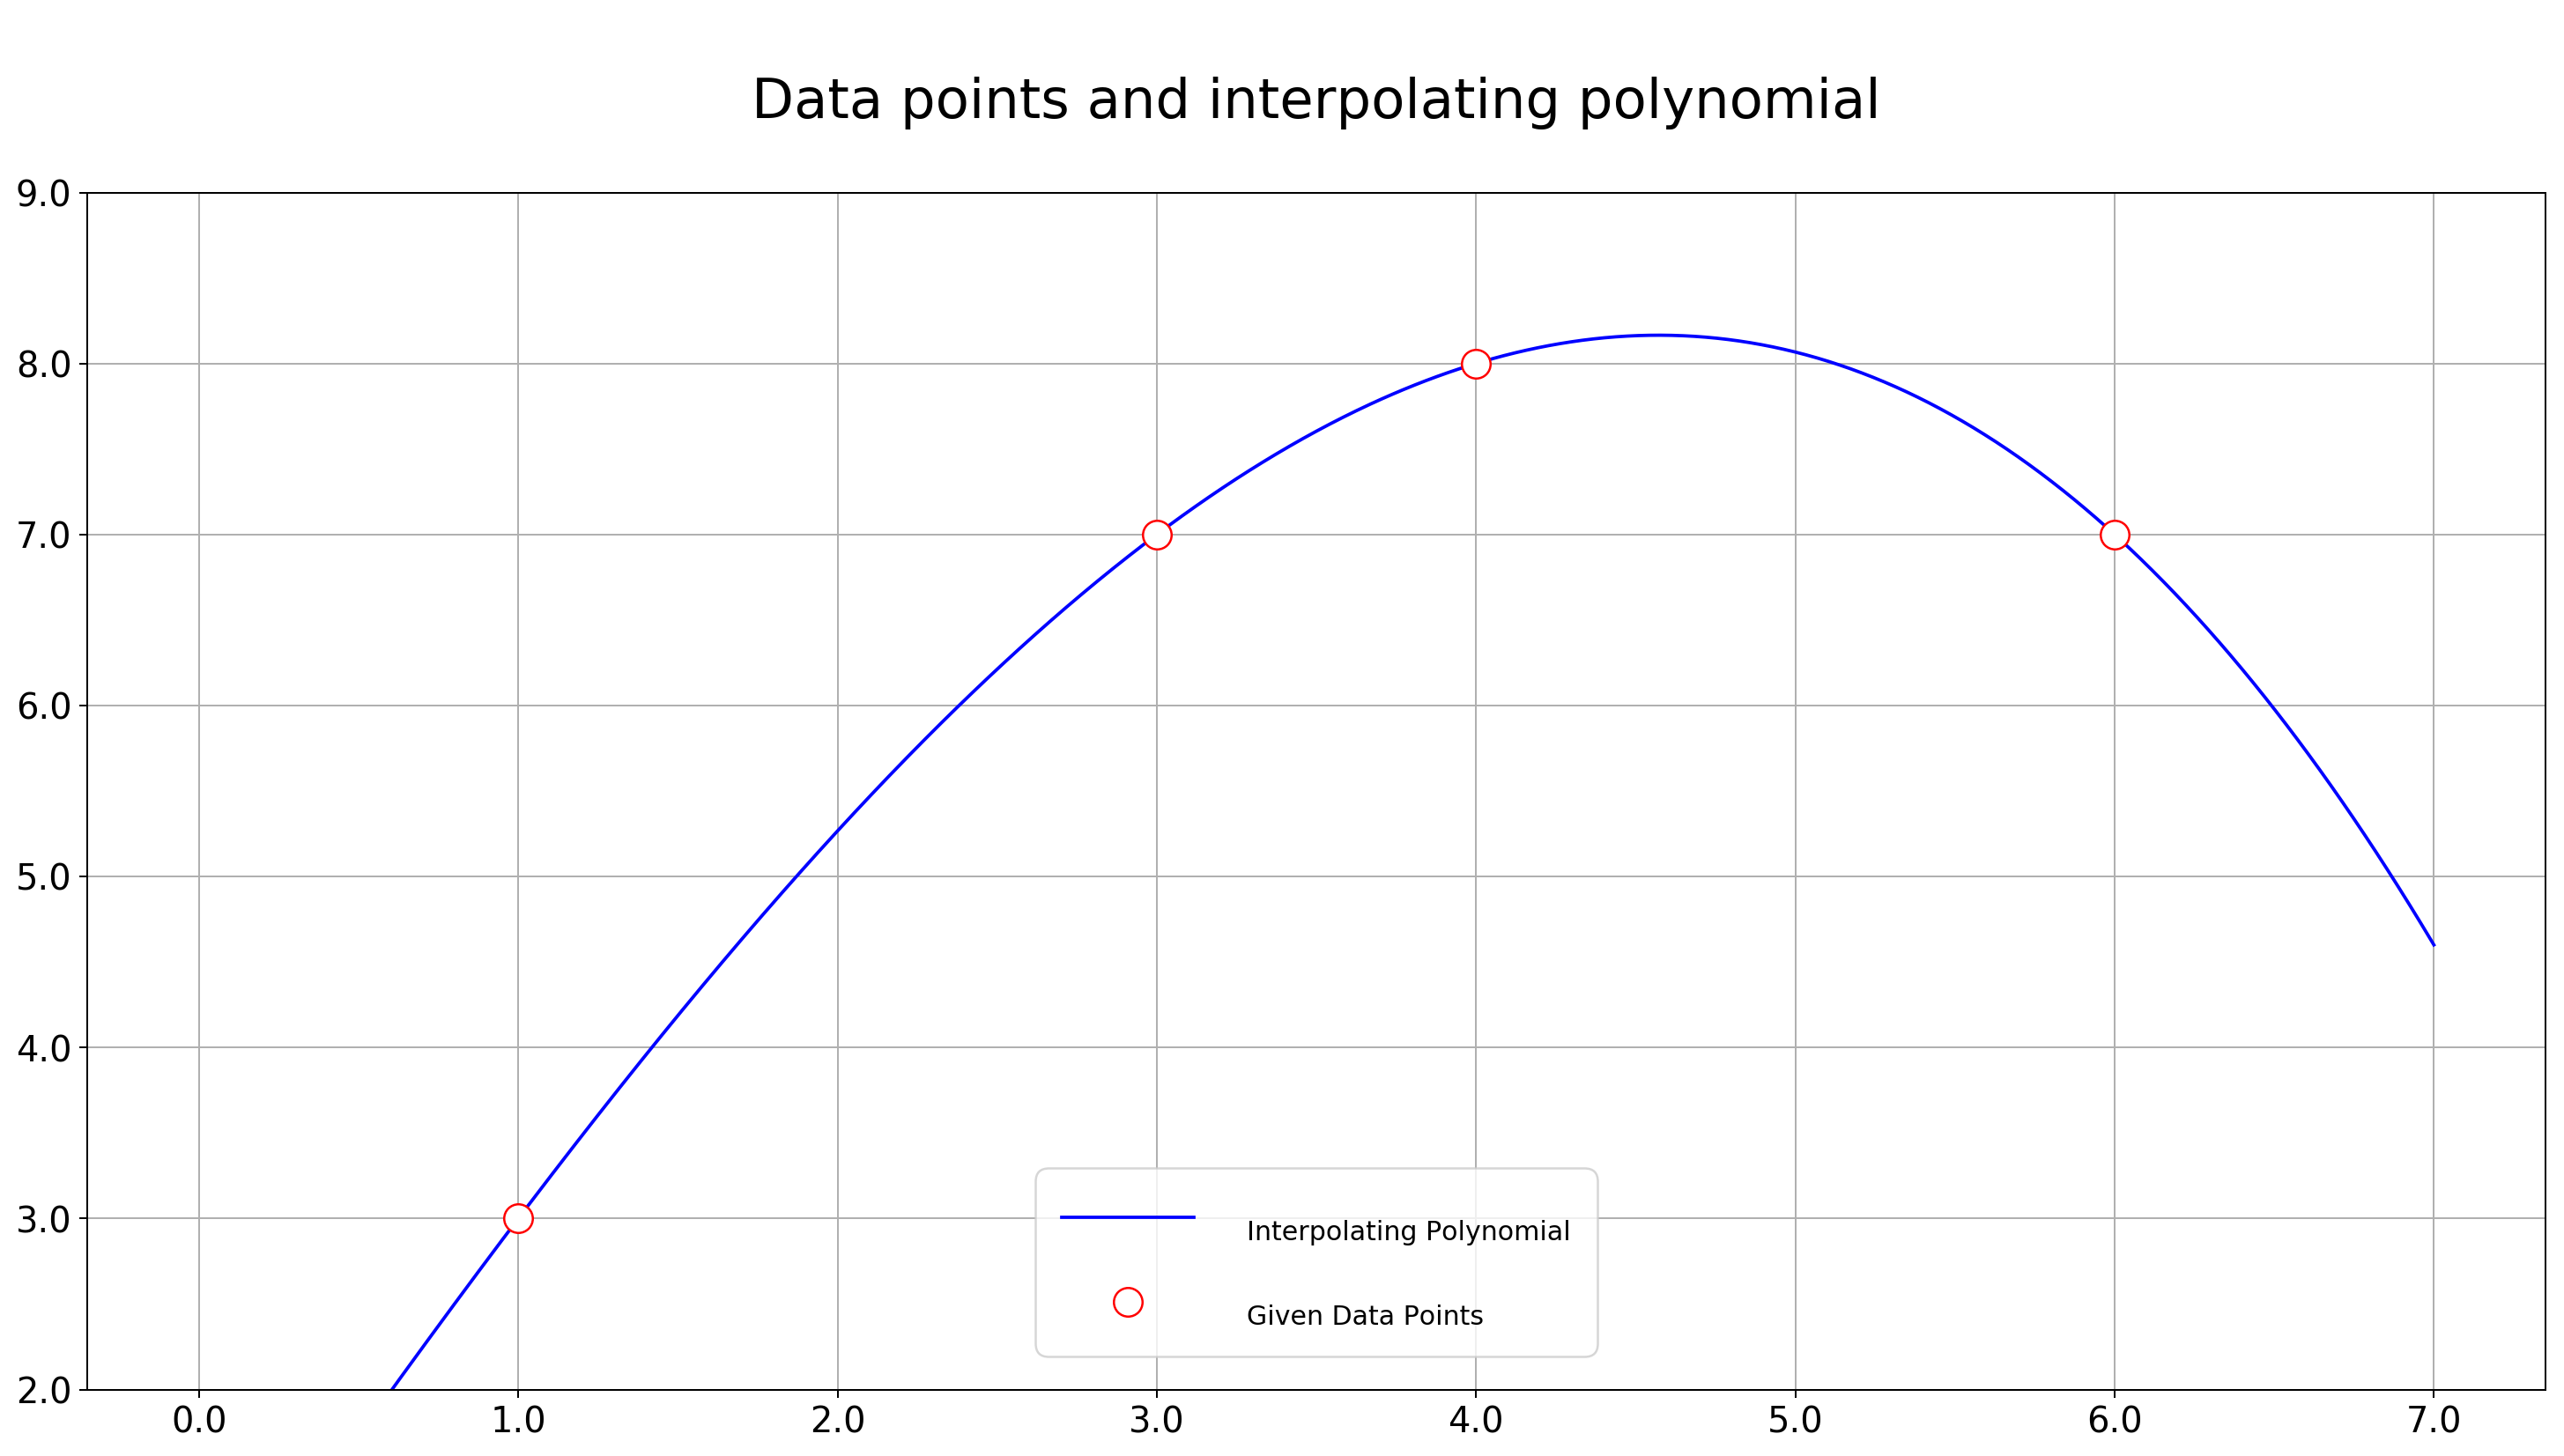

In [8]:
# Let's visulize this in a graph...
plot_interpolating_polynomial( P, data_points )